In [27]:
import pandas as pd

titanic_df = pd.read_csv("Titanic_data.csv")

In [28]:
titanic_df.shape

(891, 12)

In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Inserting and Deleting Column and Rows

In [4]:
# Dropping a column
# dataframe.drop(<column_name>, axis)
# axis : {0 or 'index', 1 or 'columns'}, default 0
#     Whether to drop labels from the index (0 or 'index') or columns (1 or 'columns')

titanic_df.drop("PassengerId", axis = 1, inplace = True)

In [5]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.drop([0,2,5], axis =0, inplace=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [7]:
titanic_df['Last_Name'] = [name.split(",")[0] for name in titanic_df['Name']]
titanic_df['Initials'] = [name.split(".")[0].split(",")[-1].strip() for name in titanic_df['Name']]
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last_Name,Initials
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr


In [8]:
dropped_titainic = titanic_df.drop(['Initials','Last_Name'], axis =1)

In [9]:
dropped_titainic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Insert new row
titanic_df.loc[900,:] = [0,3,'THapa, Mr. Ram', "male",33.2, 0,0," ", 33.4, " ", "S"]

ValueError: Must have equal len keys and value when setting with an iterable

In [ ]:
titanic_df.tail()

## Handling NaN or Null Value

In [4]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1. Remove Null values
2. Imputation
3. Feature Engineering

In [5]:
# Removing Null columns
# titanic_df_filter = titanic_df[titanic_df['Embarked'].notna()]

# dropna
titanic_df_filter = titanic_df.dropna(axis = 0, how='any', subset="Embarked", ignore_index=True)

In [52]:
# Mode imputation for categorical value
titanic_df.Embarked.fillna("S")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [6]:
titanic_df_filter.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

29.64209269662921


<Axes: ylabel='Frequency'>

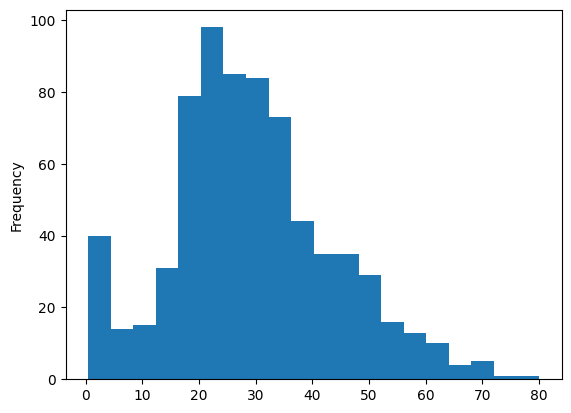

In [7]:
# Imputation (Age)
print(titanic_df_filter.Age.mean())
titanic_df_filter.Age.plot.hist(bins=20)

In [8]:
mean_age = titanic_df_filter['Age'].mean()
mean_age

np.float64(29.64209269662921)

In [9]:
titanic_df_filter['Age'].fillna(value=mean_age, inplace=True) 

/tmp/ipykernel_88845/1528236068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df_filter['Age'].fillna(value=mean_age, inplace=True)


<Axes: ylabel='Frequency'>

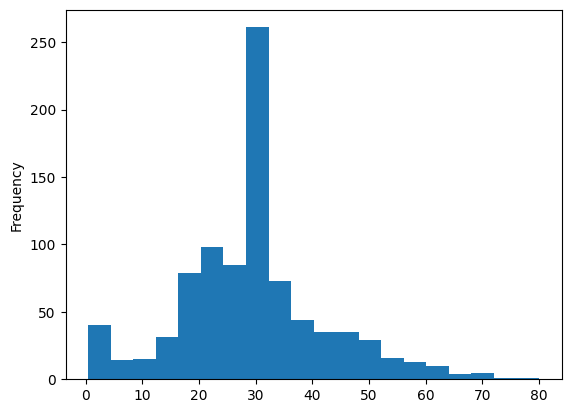

In [10]:
titanic_df_filter.Age.plot.hist(bins=20)

In [11]:
# Assignment: Imputation of Age column w.r.t gender provided.
female_mean_age = titanic_df[titanic_df.Sex== "female"]["Age"].mean()
male_mean_age = titanic_df[titanic_df.Sex== "male"]["Age"].mean()
print(female_mean_age, male_mean_age)
 
titanic_df.loc[titanic_df.Sex == "female", "Age"] = titanic_df.loc[titanic_df.Sex == "female", "Age"].fillna(value = female_mean_age)
titanic_df.loc[titanic_df.Sex == "male", "Age"] = titanic_df.loc[titanic_df.Sex == "male", "Age"].fillna(value = male_mean_age)
 
titanic_df["Age"].isna().sum()

27.915708812260537 30.72664459161148


np.int64(0)

<Axes: ylabel='Frequency'>

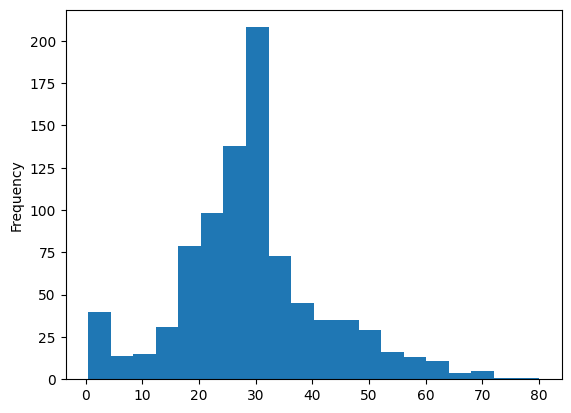

In [12]:
titanic_df.Age.plot.hist(bins=20)

### Handling Null value for Age

In [13]:
#1. Initials
#2. Each group of initlas mean
#3. Impute to respective group

In [30]:
def get_initials(fullname):
    firstname = fullname.split(",")[-1]
    inititals = firstname.split(".")[0]
    return inititals.strip()

# get_initials = lambda x: x.split(",")[-1].split(".")[0].strip()

In [31]:
# dataframe.apply()

titanic_df['Initials'] = titanic_df['Name'].apply(get_initials)

In [32]:
titanic_df['Initials'].value_counts()

Initials
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [38]:
# dataframe.replace()
replace_dict = {
    "Dr" : "Mr", "Col":"Mr", "Mlle" : "Miss", "Ms":"Mrs",
    "Mme":"Mrs", "Don" : "Mr", "Lady": "Miss", "Sir" : "Mr",
    "Capt":"Mr","Jonkheer" : "Master", "the Countess":"Mrs",
    "Major" : "Mr"
}
titanic_df['Initials'].replace(to_replace=replace_dict, inplace = True)

In [39]:
group_by_initials = titanic_df.groupby(by="Initials")
group_by_initials.Age.mean()

Initials
Master     5.477568
Miss      21.979866
Mr        32.862530
Mrs       35.693694
Rev       43.166667
Name: Age, dtype: float64

In [45]:
# dataframe.transform()
series_of_means = group_by_initials['Age'].transform('mean')

In [46]:
titanic_df.Age.fillna(series_of_means, inplace=True)

<Axes: ylabel='Frequency'>

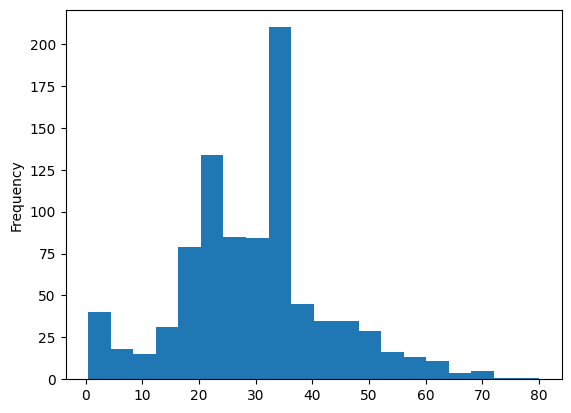

In [48]:
titanic_df.Age.plot.hist(bins=20)

In [ ]:
titanic_df_filter['Cabin']

In [ ]:
# Feature from Null value
titanic_df_filter.loc[:,'Cabin'] = titanic_df_filter['Cabin'].notna().astype(int)

In [ ]:
titanic_df_filter.isna().sum()